In [1]:
import numpy as np 
import pandas as pd

In [2]:
cancer_dataset = pd.read_csv('../Dataset/dataset.csv')

In [3]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
x = cancer_dataset.drop(columns='diagnosis', axis=1)
y = cancer_dataset['diagnosis']

In [11]:
from  sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
#x_scaled[:5]

In [12]:
features = x_scaled.T
cov_matrix = np.cov(features)
#cov_matrix[:5]

In [19]:
values, vectors = np.linalg.eig(cov_matrix)
values[:31]

array([1.33114519e+01, 5.70683496e+00, 2.84038694e+00, 1.98484548e+00,
       1.65171815e+00, 1.23684643e+00, 9.79995551e-01, 6.72935632e-01,
       4.61603682e-01, 4.03842838e-01, 3.49769685e-01, 2.94407846e-01,
       2.61606691e-01, 2.41755091e-01, 1.57250011e-01, 9.42942450e-02,
       7.99504590e-02, 5.91502270e-02, 5.26837847e-02, 4.92084099e-02,
       3.11254863e-02, 2.99939190e-02, 2.74788170e-02, 2.42917142e-02,
       1.80711203e-02, 1.55069827e-02, 8.18608563e-03, 6.91024741e-03,
       1.33274432e-04, 7.49693618e-04, 1.59213568e-03])

In [13]:
#vectors[:5]

In [10]:
explained_variances = []

for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))
    
print(np.sum(explained_variances), '\n', explained_variances)

1.0000000000000002 
 [0.42864701335977684, 0.18376791510624535, 0.09146435639067063, 0.0639147476263884, 0.05318759048637682, 0.03982815186491577, 0.03155720125988734, 0.021669450598635218, 0.014864271859401238, 0.013004293427842576, 0.011263063739057283, 0.009480336565112112, 0.008424094348287956, 0.007784845624482285, 0.005063666103868491, 0.003036404058251056, 0.0025745144699427726, 0.0019047184598312036, 0.0016964901475730748, 0.0015845783116043368, 0.0010022833622885525, 0.000965845342884941, 0.000884855606553547, 0.0007822265231410934, 0.0005819148668742792, 0.000499346118870684, 0.0002636031883888974, 0.0002225194471419646, 4.291619563319054e-06, 2.4141163043247626e-05, 5.126895309870605e-05]


In [20]:
list = [0.42864701335977684, 0.18376791510624535, 0.09146435639067063, 0.0639147476263884, 0.05318759048637682, 0.03982815186491577, 0.03155720125988734]

In [23]:
sum(list)

0.8923669760942611

In [26]:
import matplotlib.pyplot as plt

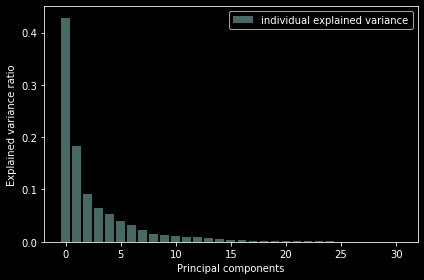

In [28]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(31), explained_variances, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()